Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
import numpy as np
import pandas as pd
from os import walk

dir, subdirs, archivos = next(walk('./files'))
y=3
frames=pd.read_excel('files/'+archivos[0], skiprows=y, na_values='Not Available', usecols = list(range(25)))
result=[]
for x in range(1,len(archivos)): 
    if(x==5): y=2
    df = pd.read_excel('files/'+archivos[x], skiprows=y, na_values='Not Available', usecols = list(range(25)))
    df['Fecha']=df['Fecha'].astype(str)
    result=pd.merge(frames, df, how="outer")
    frames=result
frames=pd.melt(frames,id_vars = 'Fecha')
frames.columns= ['Fecha','Hora','Precio']
frames

,Fecha,Hora,Precio
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073000
2,1995-07-22,0,1.073000
3,1995-07-23,0,1.073000
4,1995-07-24,0,1.000000
5,1995-07-25,0,0.990000
6,1995-07-26,0,0.500000
7,1995-07-27,0,0.500000
8,1995-07-28,0,0.000000
9,1995-07-29,0,1.000000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [2]:
aux=frames.copy()
frames.shape[0]-aux.dropna().shape[0]

406

**3.--** Compute e imprima el número de registros duplicados.

In [3]:
copia = frames.copy()
copia = copia.drop_duplicates()
registros_repetidos =  len(frames) - len(copia)
registros_repetidos

2119

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [4]:
copia = copia.dropna()
len(copia)

199819

**5.--** Compute y grafique el precio promedio diario.

Text(0.5, 1.0, 'Precio promedio diario')

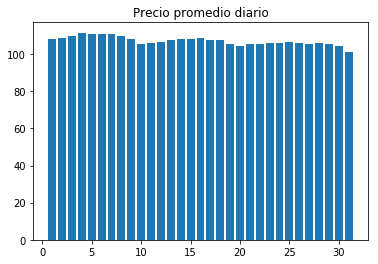

In [6]:
import matplotlib.pyplot as plt
copia2 = frames.copy()
copia2['Dia'] = pd.DatetimeIndex(copia2['Fecha']).day
dia=copia2.groupby('Dia')['Precio'].mean()
plt.bar(dia.index, dia)
plt.title('Precio promedio diario')

**6.--** Compute y grafique el precio máximo por mes.

Text(0.5, 1.0, 'Precio Maximo mensual')

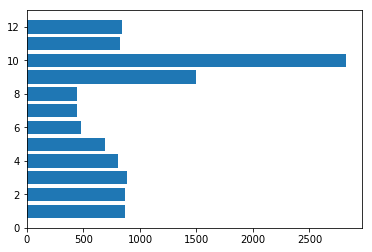

In [7]:
copia2['Mes'] = pd.DatetimeIndex(copia2['Fecha']).month
mes=copia2.groupby('Mes')['Precio'].max()
plt.barh(mes.index, mes)
plt.subplots(figsize=(69,900))
plt.title('Precio Maximo mensual')

**7.--** Compute y grafique el precio mínimo mensual.

Text(0.5, 1.0, 'Precio Minimo mensual')

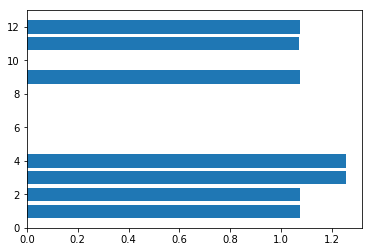

In [11]:
mes=copia2.groupby('Mes')['Precio'].min()
plt.barh(mes.index, mes)
plt.subplots(figsize=(69,900))
plt.title('Precio Minimo mensual')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0.5, 1.0, 'Precio promedio mensual')

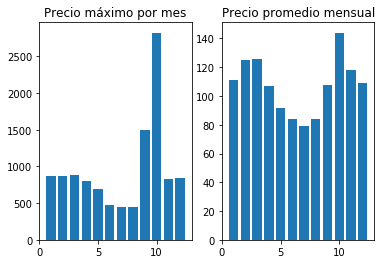

In [12]:
precio_max = copia2.groupby('Mes')['Precio'].max()
precio_prom = copia2.groupby('Mes')['Precio'].mean()
plt.subplot(1, 2,1)
plt.bar(precio_max.index, precio_max)
plt.title("Precio máximo por mes")
plt.subplot(1, 2,2)
plt.bar(precio_prom.index, precio_prom)
plt.title("Precio promedio mensual")

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0, 0.5, 'Datos')

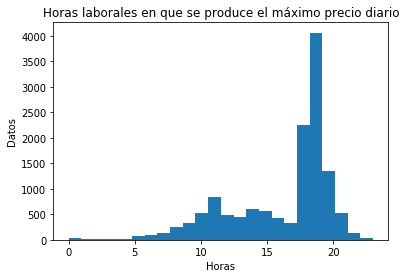

In [13]:
from datetime import datetime
import matplotlib.pyplot as plt
frames = frames.dropna()
frames['Dia'] = pd.to_datetime(frames['Fecha'], format='%Y-%m-%d', errors='coerce')
frames['Dia'] = frames['Dia'].apply(lambda x: x.strftime('%A'))
frames2 = frames[(frames['Dia'] == 'Monday') | (frames['Dia'] == 'Tuesday')| (frames['Dia'] == 'Fecha')| (frames['Dia'] == 'Thursday')| (frames['Dia'] == 'Friday')]
dfDate = frames2.groupby('Fecha').agg({'Precio': np.max}) 
dfDate.reset_index(inplace=True)
dfMerge = pd.merge(frames2, dfDate, on=['Fecha','Precio'], how='inner')
dfFinal = list(map(int,dfMerge['Hora'].tolist()))
plt.hist(dfFinal, bins=24)
plt.title('Horas laborales en que se produce el máximo precio diario')
plt.xlabel('Horas')
plt.ylabel('Datos')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0, 0.5, 'Datos')

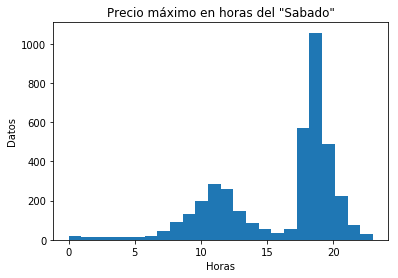

In [14]:
dfSaturday = frames[(frames['Dia'] == 'Saturday') ]
dfDate = dfSaturday.groupby('Fecha').agg({'Precio': np.max}) 
dfDate.reset_index(inplace=True)
dfMerge = pd.merge(dfSaturday, dfDate, on=['Fecha','Precio'], how='inner')
dfFinal = list(map(int,dfMerge['Hora'].tolist()))
plt.hist(dfFinal, bins=24)
plt.title('Precio máximo en horas del "Sabado"')
plt.xlabel('Horas')
plt.ylabel('Datos')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0, 0.5, 'Datos')

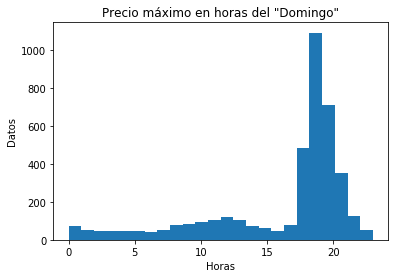

In [15]:
dfSunday = frames[(frames['Dia'] == 'Sunday') ]
dfDate = dfSunday.groupby('Fecha').agg({'Precio': np.max}) 
dfDate.reset_index(inplace=True)
dfMerge = pd.merge(dfSunday, dfDate, on=['Fecha','Precio'], how='inner')
dfFinal = list(map(int,dfMerge['Hora'].tolist()))
plt.hist(dfFinal, bins=24)
plt.title('Precio máximo en horas del "Domingo"')
plt.xlabel('Horas')
plt.ylabel('Datos')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [16]:
frames['Ano'] = pd.to_datetime(frames['Fecha'], format='%Y-%m-%d', errors='coerce')
frames['Ano'] = frames['Ano'].apply(lambda x: x.strftime('%Y'))
dfDate = frames.groupby('Ano').agg({'Precio': np.min}) 
dfDate.reset_index(inplace=True)
dfDate.columns = ["Ano","Precio_Minimo"]
dfMerge = pd.merge(dfDate, frames, on = ['Ano'], how ='inner')
dfMerge = dfMerge[(dfMerge['Precio_Minimo'] == dfMerge['Precio'])]
print(dfMerge[['Fecha','Precio_Minimo']].drop_duplicates())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                      Fecha  Precio_Minimo
7                1995-07-28       0.000000
10               1995-07-31       0.000000
11               1995-08-01       0.000000
84               1995-10-13       0.000000
338              1995-07-29       0.000000
339              1995-07-30       0.000000
3800             1995-07-26       0.000000
4143    1996-06-30 00:00:00       0.000000
4152    1996-07-09 00:00:00       0.000000
4155    1996-07-12 00:00:00       0.000000
4165    1996-07-22 00:00:00       0.000000
4166    1996-07-23 00:00:00       0.000000
4167    1996-07-24 00:00:00       0.000000
4903    1996-07-04 00:00:00       0.000000
6043    1996-07-11 00:00:00       0.000000
7868    1996-05-10 00:00:00       0.000000
9829    1996-07-21 00:00:00       0.000000
12840   1996-07-08 00:00:00       0.000000
13951            1997-07-15      10.882310
21981            1998-07-12      13.847330
21982            1998-07-13      13.847330
21983            1998-07-14      13.847330
21984      

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

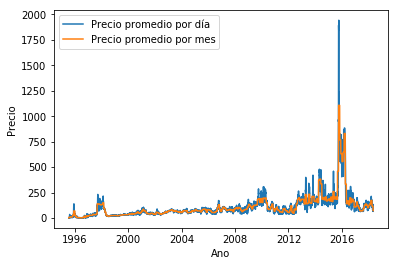

In [17]:
dfMonth =  frames.copy()
dfMonth['Fecha'] = pd.to_datetime(dfMonth['Fecha'], format='%Y-%m-%d', errors='coerce')
dfMonth['Mes'] =  dfMonth['Fecha'].apply(lambda x: x.strftime('%m'))
dfMonth['Ano'] =  dfMonth['Fecha'].apply(lambda x: x.strftime('%Y'))
dfAnoxMes = dfMonth.groupby(['Mes','Ano']).agg({'Precio': np.mean}) 
dfAnoxMes.reset_index(inplace=True)
dfAnoxMes.columns = ['Mes','Ano','Promedio_Por_Mes']

dfDay = frames.copy()
dfDay['Fecha'] = pd.to_datetime(dfDay['Fecha'])
dfDay = dfDay.groupby('Fecha').agg({'Precio': np.mean}) 
dfDay.reset_index(inplace=True)
dfDay.columns = ['Fecha','Precio_Por_Dia']

dfMerge = pd.merge(dfAnoxMes, dfMonth, on = ['Mes','Ano'], how ='inner')
dfMerge = pd.merge(dfMerge, dfDay, on = ['Fecha'], how ='inner')
dfGraf = dfMerge.groupby('Fecha').agg({'Precio_Por_Dia': np.mean,'Promedio_Por_Mes': np.mean})

plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((dfGraf.index.tolist()), dfGraf['Precio_Por_Dia'], label="Precio promedio por día")
ax.plot((dfGraf.index.tolist()), dfGraf['Promedio_Por_Mes'], label="Precio promedio por mes")
plt.xlabel("Ano")
plt.ylabel("Precio")

ax.legend()

---